In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [3]:
# Make predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [4]:
# Define a function to calculate and display evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("="*40)

    return accuracy, precision, recall, f1

# Evaluate all models
knn_metrics = evaluate_model(y_test, y_pred_knn, "KNN")
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")


KNN Performance:
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1 Score: 0.9577
Decision Tree Performance:
Accuracy: 0.9386
Precision: 0.9444
Recall: 0.9577
F1 Score: 0.9510
Random Forest Performance:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


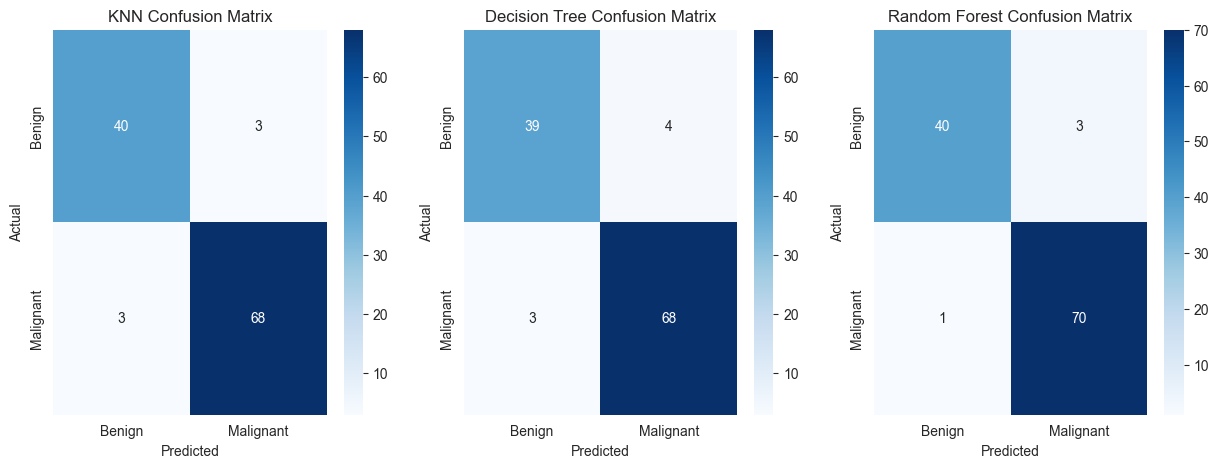

In [8]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, model_name, y_pred in zip(axes, ["KNN", "Decision Tree", "Random Forest"], [y_pred_knn, y_pred_dt, y_pred_rf]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Export matrices
# plt.savefig('confusion_matrices.png', dpi=300)

plt.show()


In [6]:
# Compare results in a table
metrics_df = pd.DataFrame(
    [knn_metrics, dt_metrics, rf_metrics],
    index=["KNN", "Decision Tree", "Random Forest"],
    columns=["Accuracy", "Precision", "Recall", "F1 Score"]
)

# Display the table
metrics_df


,Accuracy,Precision,Recall,F1 Score
KNN,0.947368,0.957746,0.957746,0.957746
Decision Tree,0.938596,0.944444,0.957746,0.951049
Random Forest,0.964912,0.958904,0.985915,0.972222


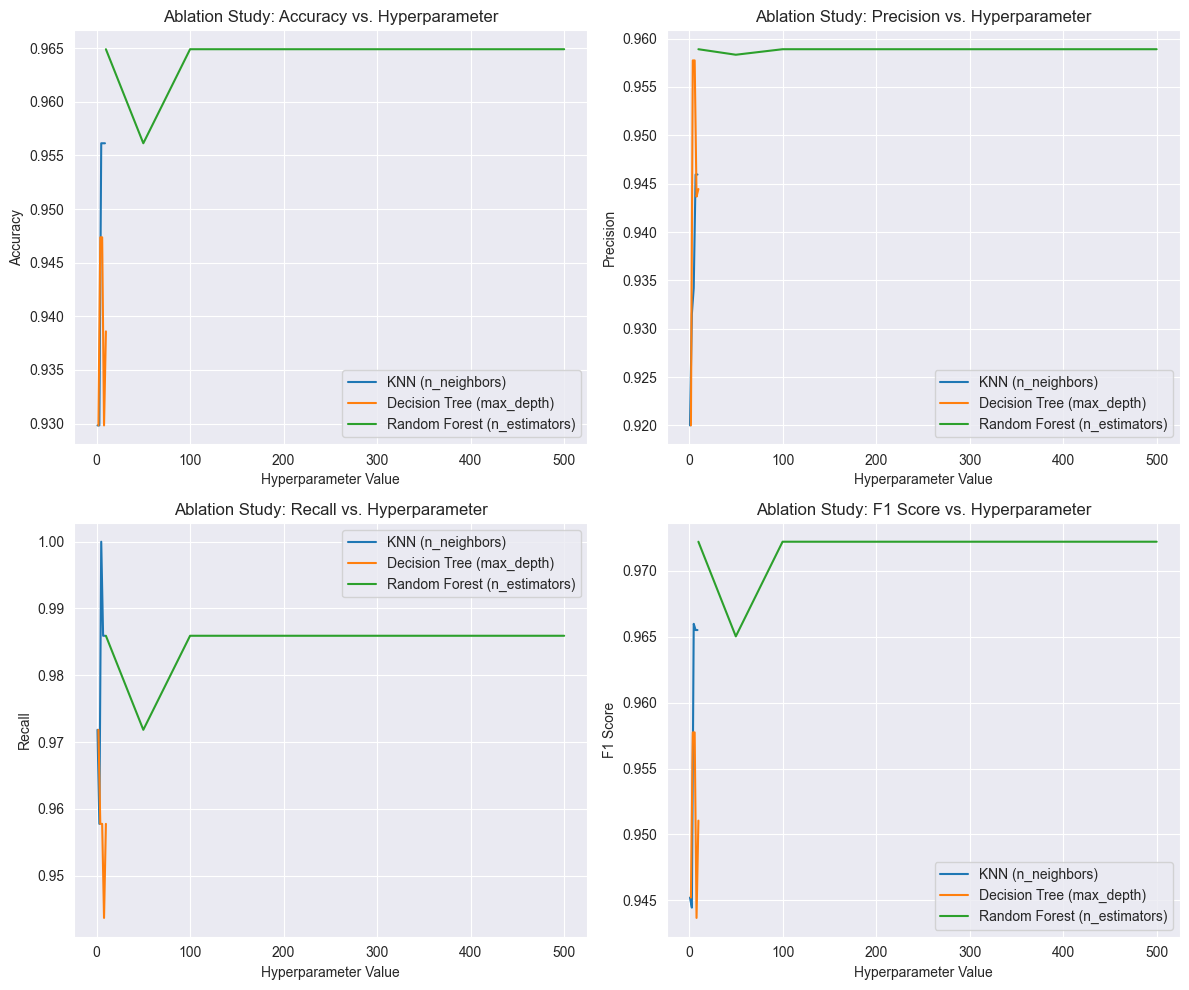

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }

# Store results for plotting
knn_results, dt_results, rf_results = [], [], []

# 1 Ablation Study for KNN (varying n_neighbors)
neighbors_range = [1, 3, 5, 7, 9]
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_results.append(evaluate_model(knn, X_train, X_test, y_train, y_test))

# 2 Ablation Study for Decision Tree (varying max_depth)
depth_values = [2, 4, 6, 8, 10]
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt_results.append(evaluate_model(dt, X_train, X_test, y_train, y_test))

# 3 Ablation Study for Random Forest (varying n_estimators)
estimators_range = [10, 50, 100, 200, 500]
for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n)
    rf_results.append(evaluate_model(rf, X_train, X_test, y_train, y_test))

# Convert results to NumPy arrays for easy plotting
knn_results = np.array([[res[key] for key in res] for res in knn_results])
dt_results = np.array([[res[key] for key in res] for res in dt_results])
rf_results = np.array([[res[key] for key in res] for res in rf_results])

# Plot the trends
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].plot(neighbors_range, knn_results[:, i], label="KNN (n_neighbors)")
    axes[i].plot(depth_values, dt_results[:, i], label="Decision Tree (max_depth)")
    axes[i].plot(estimators_range, rf_results[:, i], label="Random Forest (n_estimators)")
    axes[i].set_xlabel("Hyperparameter Value")
    axes[i].set_ylabel(metric)
    axes[i].legend()
    axes[i].set_title(f"Ablation Study: {metric} vs. Hyperparameter")

plt.tight_layout()

# Export plots
# plt.savefig('ablation_plots_for_knn_&_dts.png', dpi=300)

plt.show()
